# Transcriptomics and the analysis of RNA-Seq data

## Outline

In this class session we will:

- Open a new RStudio Project and Quarto document for today’s class;
- Review how to install both [Bioconductor](http://www.bioconductor.org/) and [CRAN](https://cran.r-project.org/) packages;
- Explore the Himes et al. gene expression data using base R, [dplyr](https://dplyr.tidyverse.org/) and [ggplot2](https://ggplot2.tidyverse.org/) package functions;
- Perform a detailed differential gene expression analysis with the [DESeq2 package](https://bioconductor.org/packages/release/bioc/html/DESeq2.html).
- Render a reproducible PDF report of your work with answers to all questions below.

For full details of the original analysis see the [PubMed entry 24926665](http://www.ncbi.nlm.nih.gov/pubmed/24926665)  and for associated data see the [GEO entry GSE52778](http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE52778).

## 2. Bioconductor setup

In [1]:
install.packages("BiocManager")
BiocManager::install()
# For this class we will need DESeq2:
BiocManager::install("DESeq2")

library(BiocManager)
library(DESeq2)


The downloaded binary packages are in
	/var/folders/vw/6c5wjngs433234dthdjypz800000gn/T//Rtmpa66FsR/downloaded_packages


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.17 (BiocManager 1.30.23), R 4.3.2 (2023-10-31)

Old packages: 'backports', 'BH', 'boot', 'broom', 'bslib', 'cachem',
  'checkmate', 'cli', 'cluster', 'codetools', 'commonmark', 'cowplot', 'cpp11',
  'curl', 'data.table', 'DBI', 'deldir', 'digest', 'dotCall64', 'dqrng',
  'emmeans', 'estimability', 'fansi', 'farver', 'fastcluster', 'fastmap',
  'FNN', 'foreign', 'fs', 'future', 'future.apply', 'ggplot2', 'ggrepel',
  'ggridges', 'ggsci', 'globals', 'glue', 'gplots', 'gtable', 'hardhat',
  'hdf5r', 'highr', 'Hmisc', 'htmltools', 'htmlwidgets', 'httpuv', 'igraph',
  'ISOcodes', 'jsonlite', 'KernSmooth', 'knitr', 'later', 'lattice', 'lda',
  'listenv', 'locfit', 'markdown', 'matrixStats', 'mgcv', 'minqa', 'munsell',
  'mvtnorm', 'nlme', 'openssl', 'parallelly', 'patchwork', '

## 3. Import countData and colData

[airway_scaledcounts.csv](https://bioboot.github.io/bimm143_W18/class-material/airway_scaledcounts.csv)

[airway_metadata.csv](https://bioboot.github.io/bimm143_W18/class-material/airway_metadata.csv)

In [2]:
# counts <- read.csv("airway_scaledcounts.csv", row.names=1)
# metadata <- read.csv("airway_metadata.csv")

#or 

counts <- read.csv("https://bioboot.github.io/bimm143_W18/class-material/airway_scaledcounts.csv", row.names=1)
metadata <- read.csv("https://bioboot.github.io/bimm143_W18/class-material/airway_metadata.csv")

In [3]:
head(counts)

,SRR1039508,SRR1039509,SRR1039512,SRR1039513,SRR1039516,SRR1039517,SRR1039520,SRR1039521
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,723,486,904,445,1170,1097,806,604
ENSG00000000005,0,0,0,0,0,0,0,0
ENSG00000000419,467,523,616,371,582,781,417,509
ENSG00000000457,347,258,364,237,318,447,330,324
ENSG00000000460,96,81,73,66,118,94,102,74
ENSG00000000938,0,0,1,0,2,0,0,0


In [4]:
head(metadata)

,id,dex,celltype,geo_id
,<chr>,<chr>,<chr>,<chr>
1,SRR1039508,control,N61311,GSM1275862
2,SRR1039509,treated,N61311,GSM1275863
3,SRR1039512,control,N052611,GSM1275866
4,SRR1039513,treated,N052611,GSM1275867
5,SRR1039516,control,N080611,GSM1275870
6,SRR1039517,treated,N080611,GSM1275871


## Q1. How many genes are in this dataset? 
- There are 38694 genes in this data set

## Q2. How many ‘control’ cell lines do we have? 
- There are 4 control cell lines in the data set

## 4. Toy differential gene expression

In [5]:
control <- metadata[metadata[,"dex"]=="control",]
control.counts <- counts[ ,control$id]
control.mean <- rowSums( control.counts )/4 
head(control.mean)

ENSG00000000003 ENSG00000000005 ENSG00000000419 ENSG00000000457 ENSG00000000460 
         900.75            0.00          520.50          339.75           97.25 
ENSG00000000938 
           0.75

In [6]:
library(dplyr)
control <- metadata %>% filter(dex=="control")
control.counts <- counts %>% select(control$id) 
control.mean <- rowSums(control.counts)/4
head(control.mean)


Attaching package: ‘dplyr’


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ENSG00000000003 ENSG00000000005 ENSG00000000419 ENSG00000000457 ENSG00000000460 
         900.75            0.00          520.50          339.75           97.25 
ENSG00000000938 
           0.75

## Q3. How would you make the above code in either approach more robust? Is there a function that could help here? 

In [7]:
control <- metadata[metadata$dex == "control", ]
control.counts <- counts[ , control$id]
control.mean <- rowMeans(control.counts)
head(control.mean)

ENSG00000000003 ENSG00000000005 ENSG00000000419 ENSG00000000457 ENSG00000000460 
         900.75            0.00          520.50          339.75           97.25 
ENSG00000000938 
           0.75

## Follow the same procedure for the treated samples (i.e. calculate the mean per gene across drug treated samples and assign to a labeled vector called treated.mean)

In [8]:
treated <- metadata[metadata$dex == "treated", ]
treated.counts <- counts[, treated$id]
treated.mean <- rowMeans(treated.counts)
head(treated.mean)

ENSG00000000003 ENSG00000000005 ENSG00000000419 ENSG00000000457 ENSG00000000460 
         658.00            0.00          546.00          316.50           78.75 
ENSG00000000938 
           0.00

In [9]:
meancounts <- data.frame(control.mean, treated.mean)

## Q5 (a). Create a scatter plot showing the mean of the treated samples against the mean of the control samples. Your plot should look something like the following.

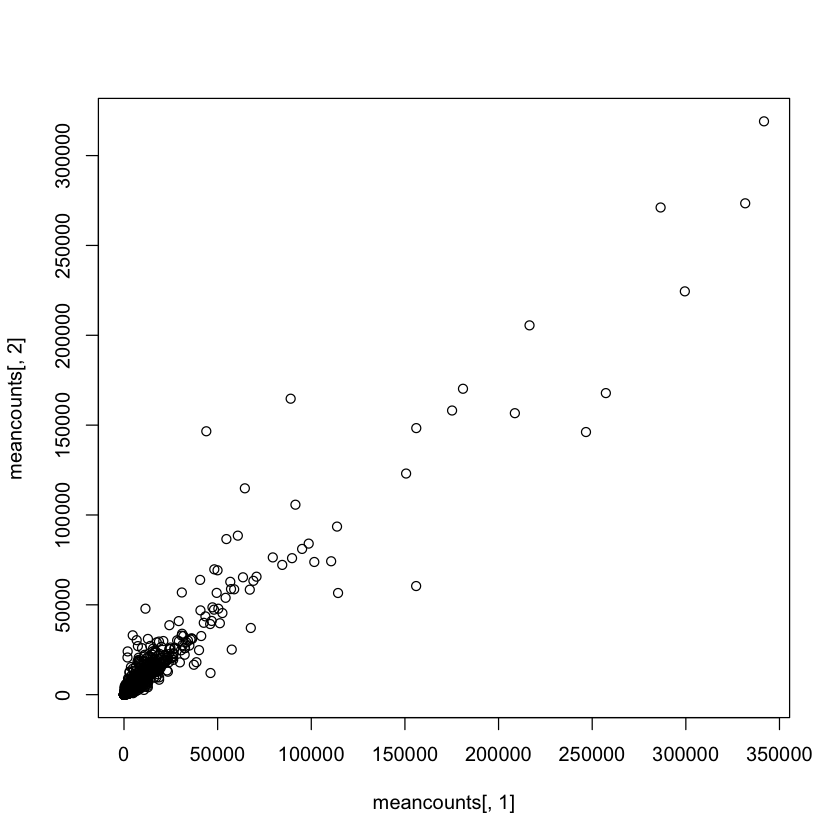

In [10]:
# plot(meancounts[,1],meancounts[,2], xlab="Control", ylab="Treated")

#or

plot(meancounts[,1], meancounts[,2])

## Q6. Try plotting both axes on a log scale. What is the argument to plot() that allows you to do this?

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“15032 x values <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“15281 y values <= 0 omitted from logarithmic plot”


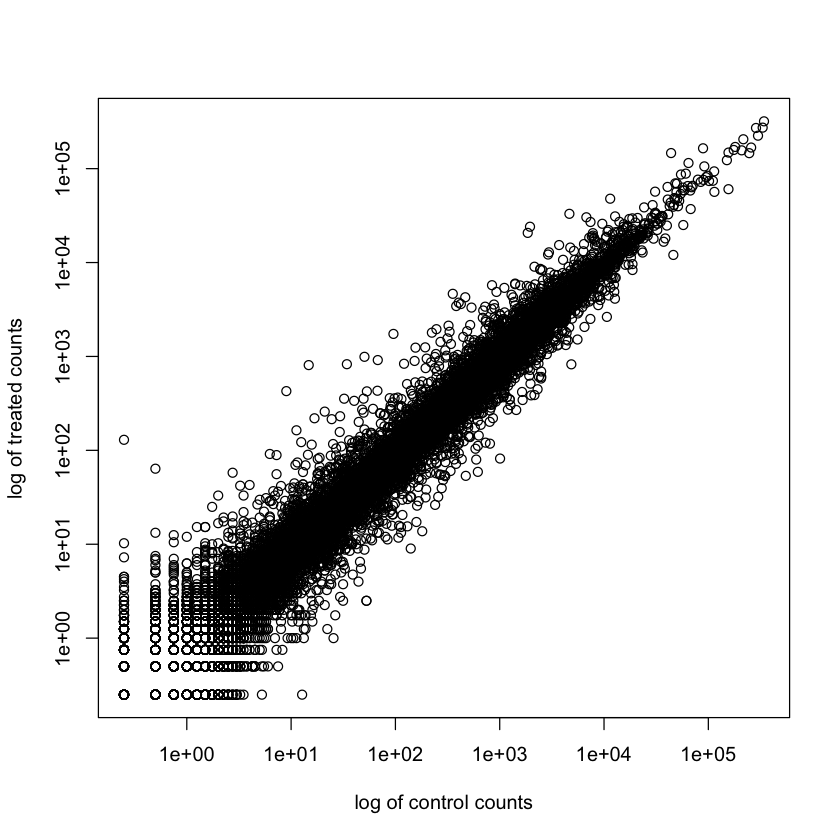

In [11]:
plot(meancounts[,1], meancounts[,2], log="xy",
xlab= "log of control counts",
ylab= "log of treated counts")

In [12]:
meancounts$log2fc <- log2(meancounts[,"treated.mean"]/meancounts[,"control.mean"])
head(meancounts)

,control.mean,treated.mean,log2fc
,<dbl>,<dbl>,<dbl>
ENSG00000000003,900.75,658.00,-0.45303916
ENSG00000000005,0.00,0.00,NaN
ENSG00000000419,520.50,546.00,0.06900279
ENSG00000000457,339.75,316.50,-0.10226805
ENSG00000000460,97.25,78.75,-0.30441833
ENSG00000000938,0.75,0.00,-Inf


In [13]:
zero.vals <- which(meancounts[,1:2]==0, arr.ind=TRUE)

to.rm <- unique(zero.vals[,1])
mycounts <- meancounts[-to.rm,]
head(mycounts)

,control.mean,treated.mean,log2fc
,<dbl>,<dbl>,<dbl>
ENSG00000000003,900.75,658.00,-0.45303916
ENSG00000000419,520.50,546.00,0.06900279
ENSG00000000457,339.75,316.50,-0.10226805
ENSG00000000460,97.25,78.75,-0.30441833
ENSG00000000971,5219.00,6687.50,0.35769358
ENSG00000001036,2327.00,1785.75,-0.38194109


## Q7. What is the purpose of the arr.ind argument in the which() function call above? Why would we then take the first column of the output and need to call the unique() function?

In [14]:
zero.values <- (which(meancounts[,1:2]==0, arr.ind=TRUE))
to.rm <- unique(zero.values[,1])
mycounts <- meancounts[-to.rm,]
head(mycounts)

,control.mean,treated.mean,log2fc
,<dbl>,<dbl>,<dbl>
ENSG00000000003,900.75,658.00,-0.45303916
ENSG00000000419,520.50,546.00,0.06900279
ENSG00000000457,339.75,316.50,-0.10226805
ENSG00000000460,97.25,78.75,-0.30441833
ENSG00000000971,5219.00,6687.50,0.35769358
ENSG00000001036,2327.00,1785.75,-0.38194109


In [15]:
nrow(mycounts)

[1] 21817

In [16]:
up.ind <- mycounts$log2fc > 2
down.ind <- mycounts$log2fc < (-2)

## Q8. Using the up.ind vector above can you determine how many up regulated genes we have at the greater than 2 fc level? 

In [17]:
sum(up.ind)

[1] 250

## Q9. Using the down.ind vector above can you determine how many down regulated genes we have at the greater than 2 fc level?

In [18]:
sum(down.ind)

[1] 367

## Q10. Do you trust these results? Why or why not?
- No, the next section will better encapsulate the results using statistics

# 5. Setting up for DESeq

In [19]:
library(DESeq2)
citation("DESeq2")

To cite package ‘DESeq2’ in publications use:

  Love, M.I., Huber, W., Anders, S. Moderated estimation of fold change
  and dispersion for RNA-seq data with DESeq2 Genome Biology 15(12):550
  (2014)

A BibTeX entry for LaTeX users is

  @Article{,
    title = {Moderated estimation of fold change and dispersion for RNA-seq data with DESeq2},
    author = {Michael I. Love and Wolfgang Huber and Simon Anders},
    year = {2014},
    journal = {Genome Biology},
    doi = {10.1186/s13059-014-0550-8},
    volume = {15},
    issue = {12},
    pages = {550},
  }

## Importing data

In [20]:
dds <- DESeqDataSetFromMatrix(countData=counts, 
                              colData=metadata, 
                              design=~dex)
dds

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 38694 8 
metadata(1): version
assays(1): counts
rownames(38694): ENSG00000000003 ENSG00000000005 ... ENSG00000283120
  ENSG00000283123
rowData names(0):
colnames(8): SRR1039508 SRR1039509 ... SRR1039520 SRR1039521
colData names(4): id dex celltype geo_id

## 6. Principal Component Analysis (PCA)

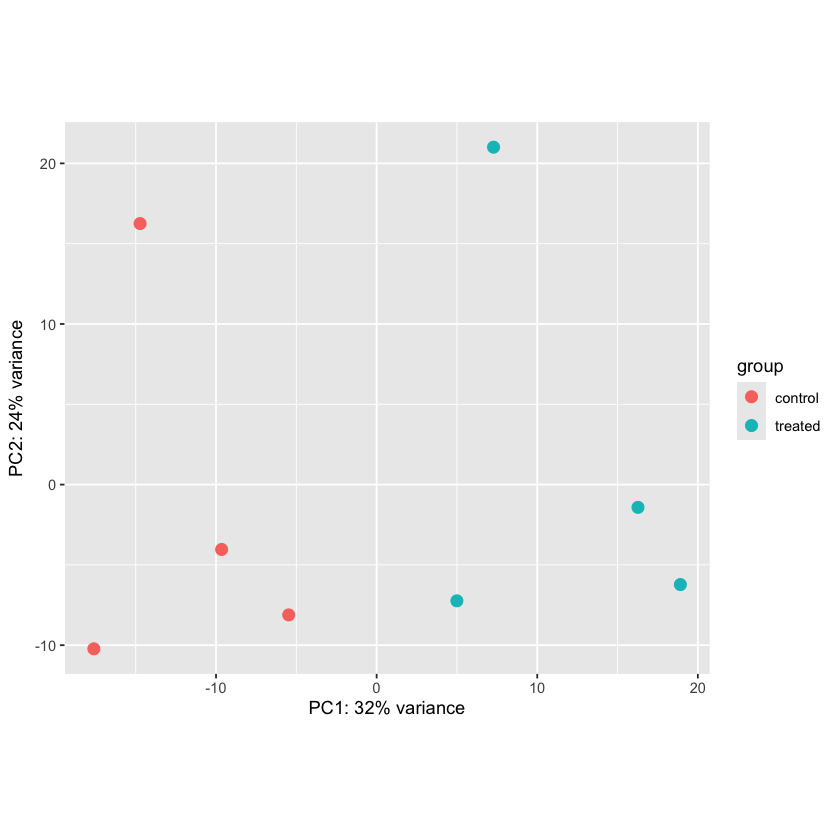

In [21]:
vsd <- vst(dds, blind = FALSE)
plotPCA(vsd, intgroup = c("dex"))

In [22]:
pcaData <- plotPCA(vsd, intgroup=c("dex"), returnData=TRUE)
head(pcaData)

,PC1,PC2,group,dex,name
,<dbl>,<dbl>,<fct>,<fct>,<chr>
SRR1039508,-17.607922,-10.225252,control,control,SRR1039508
SRR1039509,4.996738,-7.238117,treated,treated,SRR1039509
SRR1039512,-5.474456,-8.113993,control,control,SRR1039512
SRR1039513,18.912974,-6.226041,treated,treated,SRR1039513
SRR1039516,-14.729173,16.252000,control,control,SRR1039516
SRR1039517,7.279863,21.008034,treated,treated,SRR1039517


In [23]:
# Calculate percent variance per PC for the plot axis labels
percentVar <- round(100 * attr(pcaData, "percentVar"))

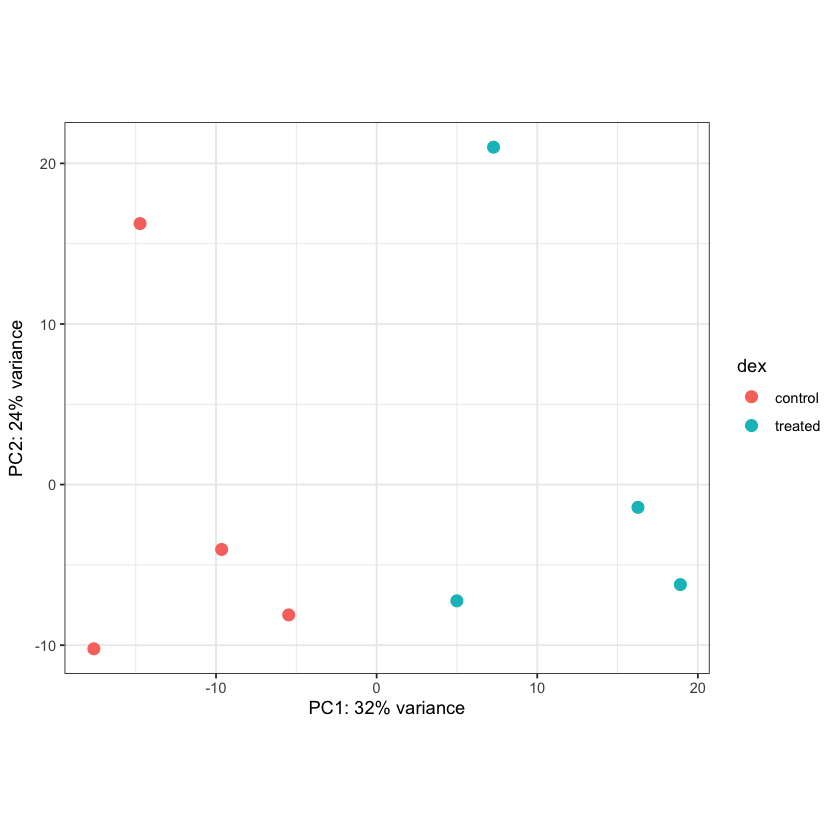

In [24]:
library(ggplot2)

ggplot(pcaData) +
  aes(x = PC1, y = PC2, color = dex) +
  geom_point(size =3) +
  xlab(paste0("PC1: ", percentVar[1], "% variance")) +
  ylab(paste0("PC2: ", percentVar[2], "% variance")) +
  coord_fixed() +
  theme_bw()

## 7. DESeq analysis

In [25]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



## Getting results

In [26]:
res <- results(dds)
res

log2 fold change (MLE): dex treated vs control 
Wald test p-value: dex treated vs control 
DataFrame with 38694 rows and 6 columns
                 baseMean log2FoldChange     lfcSE      stat    pvalue
                <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSG00000000003  747.1942     -0.3507030  0.168246 -2.084470 0.0371175
ENSG00000000005    0.0000             NA        NA        NA        NA
ENSG00000000419  520.1342      0.2061078  0.101059  2.039475 0.0414026
ENSG00000000457  322.6648      0.0245269  0.145145  0.168982 0.8658106
ENSG00000000460   87.6826     -0.1471420  0.257007 -0.572521 0.5669691
...                   ...            ...       ...       ...       ...
ENSG00000283115  0.000000             NA        NA        NA        NA
ENSG00000283116  0.000000             NA        NA        NA        NA
ENSG00000283119  0.000000             NA        NA        NA        NA
ENSG00000283120  0.974916      -0.668258   1.69456 -0.394354  0.693319
ENSG00000283123  

In [27]:
summary(res, alpha=0.05)

#or

# res05 <- results(dds, alpha=0.05)
# summary(res05)


out of 25258 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 1242, 4.9%
LFC < 0 (down)     : 939, 3.7%
outliers [1]       : 142, 0.56%
low counts [2]     : 9971, 39%
(mean count < 10)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



## 8. Adding annotation data

In [28]:
library("AnnotationDbi")
library("org.Hs.eg.db")

columns(org.Hs.eg.db)


Attaching package: ‘AnnotationDbi’


The following object is masked from ‘package:dplyr’:

    select






[1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GENETYPE"     "GO"           "GOALL"        "IPI"          "MAP"         
[16] "OMIM"         "ONTOLOGY"     "ONTOLOGYALL"  "PATH"         "PFAM"        
[21] "PMID"         "PROSITE"      "REFSEQ"       "SYMBOL"       "UCSCKG"      
[26] "UNIPROT"

In [29]:
res$symbol <- mapIds(org.Hs.eg.db,
                     keys=row.names(res), # Our genenames
                     keytype="ENSEMBL",        # The format of our genenames
                     column="SYMBOL",          # The new format we want to add
                     multiVals="first")

'select()' returned 1:many mapping between keys and columns



In [30]:
head(res)

log2 fold change (MLE): dex treated vs control 
Wald test p-value: dex treated vs control 
DataFrame with 6 rows and 7 columns
                  baseMean log2FoldChange     lfcSE      stat    pvalue
                 <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSG00000000003 747.194195     -0.3507030  0.168246 -2.084470 0.0371175
ENSG00000000005   0.000000             NA        NA        NA        NA
ENSG00000000419 520.134160      0.2061078  0.101059  2.039475 0.0414026
ENSG00000000457 322.664844      0.0245269  0.145145  0.168982 0.8658106
ENSG00000000460  87.682625     -0.1471420  0.257007 -0.572521 0.5669691
ENSG00000000938   0.319167     -1.7322890  3.493601 -0.495846 0.6200029
                     padj      symbol
                <numeric> <character>
ENSG00000000003  0.163035      TSPAN6
ENSG00000000005        NA        TNMD
ENSG00000000419  0.176032        DPM1
ENSG00000000457  0.961694       SCYL3
ENSG00000000460  0.815849       FIRRM
ENSG00000000938        NA      

## Q11. Run the mapIds() function two more times to add the Entrez ID and UniProt accession and GENENAME as new columns called res$entrez, res$uniprot and res$genename.

In [31]:
res$entrez <- mapIds(org.Hs.eg.db,
                     keys=row.names(res),
                     column="ENTREZID",
                     keytype="ENSEMBL",
                     multiVals="first")

res$uniprot <- mapIds(org.Hs.eg.db,
                     keys=row.names(res),
                     column="UNIPROT",
                     keytype="ENSEMBL",
                     multiVals="first")

res$genename <- mapIds(org.Hs.eg.db,
                     keys=row.names(res),
                     column="GENENAME",
                     keytype="ENSEMBL",
                     multiVals="first")

head(res)

'select()' returned 1:many mapping between keys and columns

'select()' returned 1:many mapping between keys and columns

'select()' returned 1:many mapping between keys and columns



log2 fold change (MLE): dex treated vs control 
Wald test p-value: dex treated vs control 
DataFrame with 6 rows and 10 columns
                  baseMean log2FoldChange     lfcSE      stat    pvalue
                 <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSG00000000003 747.194195     -0.3507030  0.168246 -2.084470 0.0371175
ENSG00000000005   0.000000             NA        NA        NA        NA
ENSG00000000419 520.134160      0.2061078  0.101059  2.039475 0.0414026
ENSG00000000457 322.664844      0.0245269  0.145145  0.168982 0.8658106
ENSG00000000460  87.682625     -0.1471420  0.257007 -0.572521 0.5669691
ENSG00000000938   0.319167     -1.7322890  3.493601 -0.495846 0.6200029
                     padj      symbol      entrez     uniprot
                <numeric> <character> <character> <character>
ENSG00000000003  0.163035      TSPAN6        7105  A0A024RCI0
ENSG00000000005        NA        TNMD       64102      Q9H2S6
ENSG00000000419  0.176032        DPM1        881

In [32]:
ord <- order( res$padj )
#View(res[ord,])
head(res[ord,])

log2 fold change (MLE): dex treated vs control 
Wald test p-value: dex treated vs control 
DataFrame with 6 rows and 10 columns
                 baseMean log2FoldChange     lfcSE      stat      pvalue
                <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000152583   954.771        4.36836 0.2371268   18.4220 8.74490e-76
ENSG00000179094   743.253        2.86389 0.1755693   16.3120 8.10784e-60
ENSG00000116584  2277.913       -1.03470 0.0650984  -15.8944 6.92855e-57
ENSG00000189221  2383.754        3.34154 0.2124058   15.7319 9.14433e-56
ENSG00000120129  3440.704        2.96521 0.2036951   14.5571 5.26424e-48
ENSG00000148175 13493.920        1.42717 0.1003890   14.2164 7.25128e-46
                       padj      symbol      entrez     uniprot
                  <numeric> <character> <character> <character>
ENSG00000152583 1.32441e-71     SPARCL1        8404  A0A024RDE1
ENSG00000179094 6.13966e-56        PER1        5187      O15534
ENSG00000116584 3.49776e-53     

In [33]:
write.csv(res[ord,], "deseq_results.csv")

## 9. Data Visualization

## Volcano plots

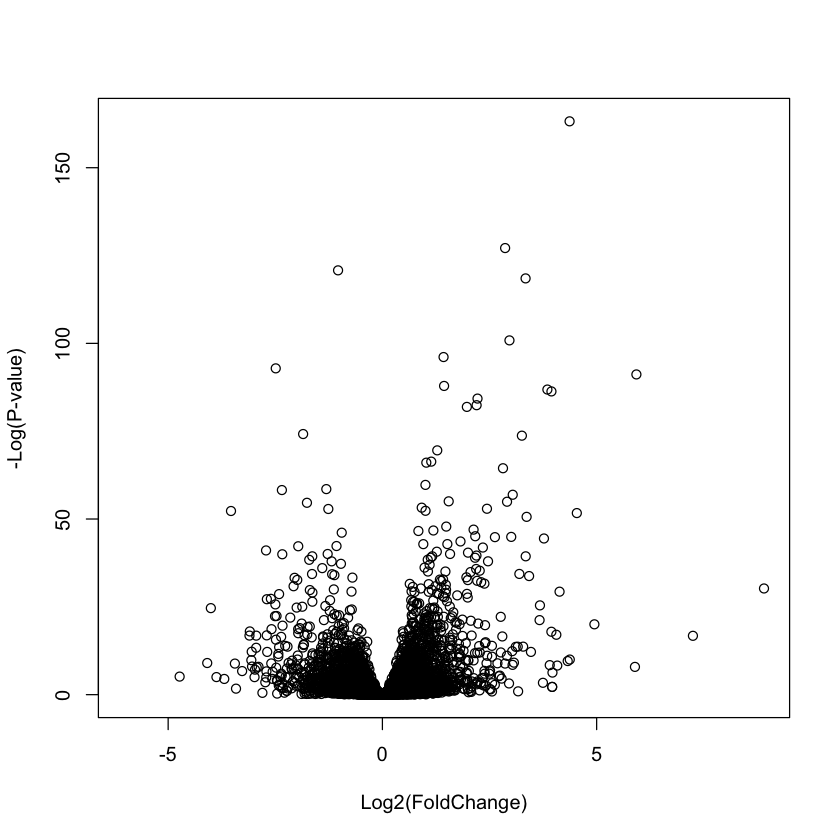

In [34]:
#plot(res$log2FoldChange,  -log(res$padj)

plot( res$log2FoldChange,  -log(res$padj), 
      xlab="Log2(FoldChange)",
      ylab="-Log(P-value)")

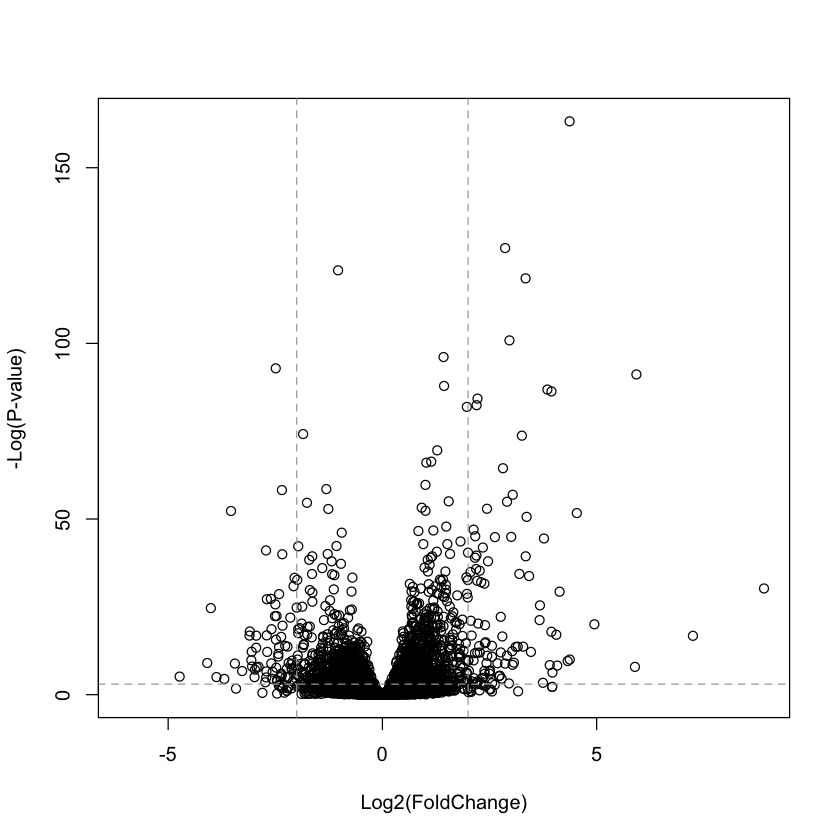

In [35]:
plot( res$log2FoldChange,  -log(res$padj), 
 ylab="-Log(P-value)", xlab="Log2(FoldChange)")

# Add some cut-off lines
abline(v=c(-2,2), col="darkgray", lty=2)
abline(h=-log(0.05), col="darkgray", lty=2)

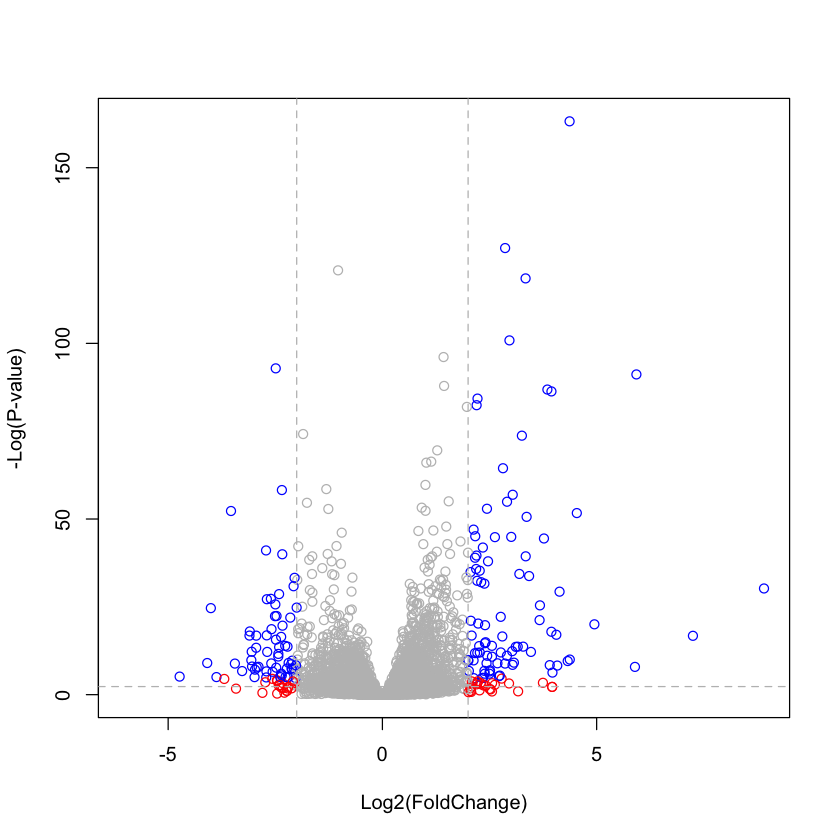

In [36]:
# Setup our custom point color vector 
mycols <- rep("gray", nrow(res))
mycols[ abs(res$log2FoldChange) > 2 ]  <- "red" 

inds <- (res$padj < 0.01) & (abs(res$log2FoldChange) > 2 )
mycols[ inds ] <- "blue"

# Volcano plot with custom colors 
plot( res$log2FoldChange,  -log(res$padj), 
 col=mycols, ylab="-Log(P-value)", xlab="Log2(FoldChange)" )

# Cut-off lines
abline(v=c(-2,2), col="gray", lty=2)
abline(h=-log(0.1), col="gray", lty=2)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.17 (BiocManager 1.30.23), R 4.3.2 (2023-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'EnhancedVolcano'”
Old packages: 'backports', 'BH', 'boot', 'broom', 'bslib', 'cachem',
  'checkmate', 'cli', 'cluster', 'codetools', 'commonmark', 'cowplot', 'cpp11',
  'curl', 'data.table', 'DBI', 'deldir', 'digest', 'dotCall64', 'dqrng',
  'emmeans', 'estimability', 'fansi', 'farver', 'fastcluster', 'fastmap',
  'FNN', 'foreign', 'fs', 'future', 'future.apply', 'ggplot2', 'ggrepel',
  'ggridges', 'ggsci', 'globals', 'glue', 'gplots', 'gtable', 'hardhat',
  'hdf5r', 'highr', 'Hmisc', 'htmltools', 'htmlwidgets', 'httpuv', 'igraph',
  'ISOcodes', 'jsonlite', 'KernSmooth', 'knitr', 'later', 'lattice'

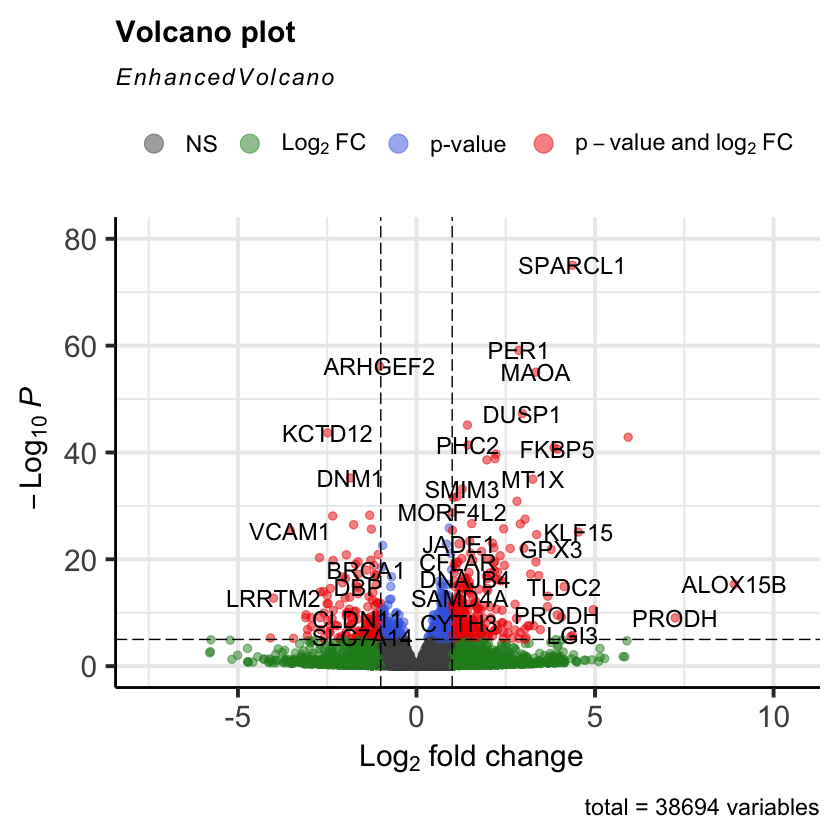

In [37]:
BiocManager::install("EnhancedVolcano")
library(EnhancedVolcano)

x <- as.data.frame(res)

EnhancedVolcano(x,
    lab = x$symbol,
    x = 'log2FoldChange',
    y = 'pvalue')

## 10. Pathway analysis

## Patway analysis with R and Bioconductor

In [38]:
# Run in your R console (i.e. not your Rmarkdown doc!)
BiocManager::install( c("pathview", "gage", "gageData") )

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.17 (BiocManager 1.30.23), R 4.3.2 (2023-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'pathview' 'gage' 'gageData'”
Old packages: 'backports', 'BH', 'boot', 'broom', 'bslib', 'cachem',
  'checkmate', 'cli', 'cluster', 'codetools', 'commonmark', 'cowplot', 'cpp11',
  'curl', 'data.table', 'DBI', 'deldir', 'digest', 'dotCall64', 'dqrng',
  'emmeans', 'estimability', 'fansi', 'farver', 'fastcluster', 'fastmap',
  'FNN', 'foreign', 'fs', 'future', 'future.apply', 'ggplot2', 'ggrepel',
  'ggridges', 'ggsci', 'globals', 'glue', 'gplots', 'gtable', 'hardhat',
  'hdf5r', 'highr', 'Hmisc', 'htmltools', 'htmlwidgets', 'httpuv', 'igraph',
  'ISOcodes', 'jsonlite', 'KernSmooth', 'knitr', 'later'

In [39]:
library(pathview)
library(gage)
library(gageData)

data(kegg.sets.hs)

# Examine the first 2 pathways in this kegg set for humans
head(kegg.sets.hs, 2)

##############################################################################
Pathview is an open source software package distributed under GNU General
Public License version 3 (GPLv3). Details of GPLv3 is available at
http://www.gnu.org/licenses/gpl-3.0.html. Particullary, users are required to
formally cite the original Pathview paper (not just mention it) in publications
or products. For details, do citation("pathview") within R.

The pathview downloads and uses KEGG data. Non-academic uses may require a KEGG
license agreement (details at http://www.kegg.jp/kegg/legal.html).
##############################################################################





$`hsa00232 Caffeine metabolism`
[1] "10"   "1544" "1548" "1549" "1553" "7498" "9"   

$`hsa00983 Drug metabolism - other enzymes`
 [1] "10"     "1066"   "10720"  "10941"  "151531" "1548"   "1549"   "1551"  
 [9] "1553"   "1576"   "1577"   "1806"   "1807"   "1890"   "221223" "2990"  
[17] "3251"   "3614"   "3615"   "3704"   "51733"  "54490"  "54575"  "54576" 
[25] "54577"  "54578"  "54579"  "54600"  "54657"  "54658"  "54659"  "54963" 
[33] "574537" "64816"  "7083"   "7084"   "7172"   "7363"   "7364"   "7365"  
[41] "7366"   "7367"   "7371"   "7372"   "7378"   "7498"   "79799"  "83549" 
[49] "8824"   "8833"   "9"      "978"

In [40]:
foldchanges = res$log2FoldChange
names(foldchanges) = res$entrez
head(foldchanges)

7105       64102        8813       57147       55732        2268 
-0.35070302          NA  0.20610777  0.02452695 -0.14714205 -1.73228897

In [41]:
# Get the results
keggres = gage(foldchanges, gsets=kegg.sets.hs)
attributes(keggres)

$names
[1] "greater" "less"    "stats"

In [42]:
head(keggres$less, 3)

,p.geomean,stat.mean,p.val,q.val,set.size,exp1
hsa05332 Graft-versus-host disease,0.0004250461,-3.473346,0.0004250461,0.09053483,40,0.0004250461
hsa04940 Type I diabetes mellitus,0.0017820293,-3.002352,0.0017820293,0.14232581,42,0.0017820293
hsa05310 Asthma,0.0020045888,-3.009050,0.0020045888,0.14232581,29,0.0020045888


In [43]:
write.csv(res, file="DESeq2_results.csv")